In [1]:
#### IMPORTS ####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [8]:
#### THE DATA ####
train = pd.read_csv('/data/ecg/mitbih_train.csv', header=None)
test = pd.read_csv('/data/ecg/mitbih_test.csv', header=None)

normal_data = pd.read_csv('/data/ecg/ptbdb_normal.csv', header=None)
abnormal_data = pd.read_csv('/data/ecg/ptbdb_abnormal.csv', header=None)

In [9]:
### merging each dataset ###
merged_mit = pd.concat([train, test])
merged_ptb = pd.concat([normal_data, abnormal_data])

In [10]:
print(merged_mit[187].value_counts())
print(merged_ptb[187].value_counts())

0.0    90589
4.0     8039
2.0     7236
1.0     2779
3.0      803
Name: 187, dtype: int64
1.0    10506
0.0     4046
Name: 187, dtype: int64


In [11]:
print("TRAIN SHAPE: {}, TEST SHAPE: {}, BOTH: {}".format(train.shape,test.shape, merged_mit.shape))

TRAIN SHAPE: (87554, 188), TEST SHAPE: (21892, 188), BOTH: (109446, 188)


In [12]:
### FOCUSING ON THE MIT DATABASE ###

In [13]:
merged_mit.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,...,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000
mean,0.891170,0.758909,0.424503,0.219602,0.201237,0.210298,0.205607,0.201617,0.198480,0.196610,...,0.004937,0.004568,0.004237,0.003914,0.003673,0.003469,0.003210,0.002956,0.002835,0.473439
std,0.239657,0.221190,0.227561,0.207248,0.177191,0.171965,0.178374,0.177020,0.171469,0.168028,...,0.043951,0.042109,0.040471,0.038801,0.037465,0.036552,0.035015,0.033413,0.032620,1.143232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.922252,0.682648,0.251014,0.048853,0.082418,0.088300,0.073171,0.066093,0.064893,0.068615,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991202,0.826560,0.430174,0.166355,0.147842,0.158640,0.145078,0.144465,0.150073,0.148849,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910868,0.579832,0.342707,0.259045,0.287500,0.298343,0.295235,0.290623,0.283465,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


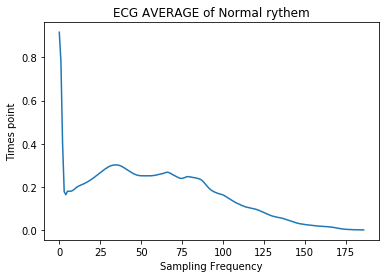

In [14]:
label_0 = merged_mit[merged_mit[187] == 0]
label_0_only_186 = label_0.drop(columns=187)
label_0_mean = label_0_only_186.mean()

plt.plot(label_0_mean)
plt.title('ECG AVERAGE of Normal rythem')
plt.xlabel('Sampling Frequency')
plt.ylabel('Times point');

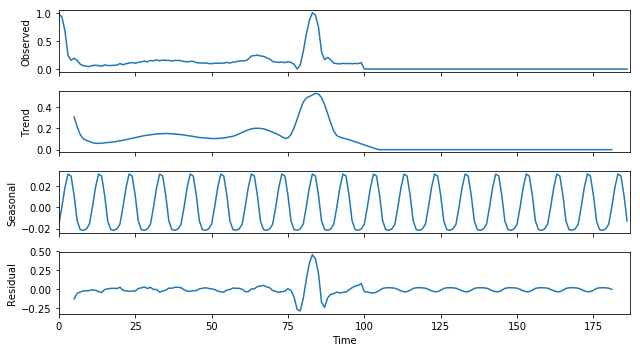

In [40]:
# TIME SERIES PLOT FOR ONE NORMAL BEAT IN MIT DATA
import matplotlib
decomposition = sm.tsa.seasonal_decompose(label_0_only_186.iloc[0].values, model='additive', freq=10)
decomposition.plot()
plt.show()

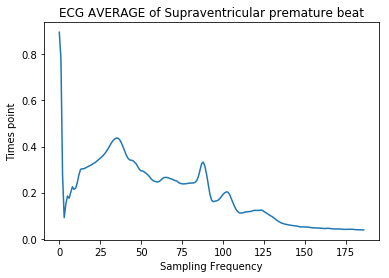

In [15]:
label_1 = merged_mit[merged_mit[187] == 1]
label_1_only_186 = label_1.drop(columns=187)
label_1_mean = label_1_only_186.mean()

plt.plot(label_1_mean)
plt.title('ECG AVERAGE of Supraventricular premature beat')
plt.xlabel('Sampling Frequency')
plt.ylabel('Times point');

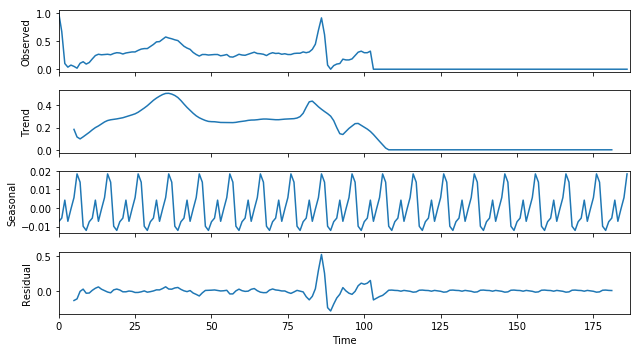

In [41]:
# TIME SERIES PLOT FOR ONE Supraventricular premature BEAT IN MIT DATA
import matplotlib
decomposition = sm.tsa.seasonal_decompose(label_1_only_186.iloc[0].values, model='additive', freq=10)
decomposition.plot()
plt.show()

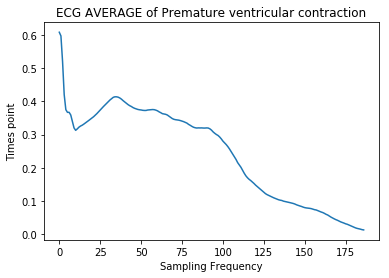

In [16]:
label_2 = merged_mit[merged_mit[187] == 2]
label_2_only_186 = label_2.drop(columns=187)
label_2_mean = label_2_only_186.mean()

plt.plot(label_2_mean)
plt.title('ECG AVERAGE of Premature ventricular contraction')
plt.xlabel('Sampling Frequency')
plt.ylabel('Times point');

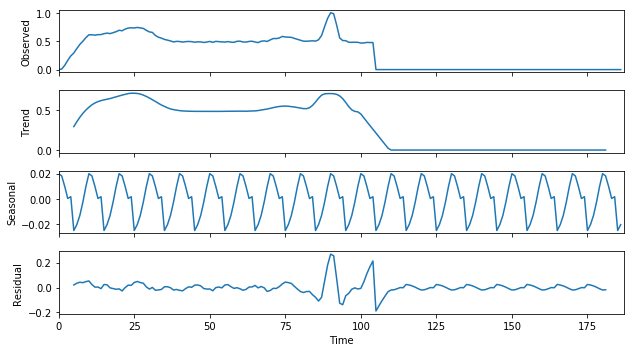

In [42]:
# TIME SERIES PLOT FOR ONE Premature ventricular contraction IN MIT DATA
import matplotlib
decomposition = sm.tsa.seasonal_decompose(label_2_only_186.iloc[0].values, model='additive', freq=10)
decomposition.plot()
plt.show()

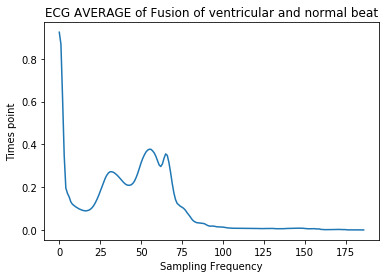

In [17]:
label_3 = merged_mit[merged_mit[187] == 3]
label_3_only_186 = label_3.drop(columns=187)
label_3_mean = label_3_only_186.mean()

plt.plot(label_3_mean)
plt.title('ECG AVERAGE of Fusion of ventricular and normal beat')
plt.xlabel('Sampling Frequency')
plt.ylabel('Times point');

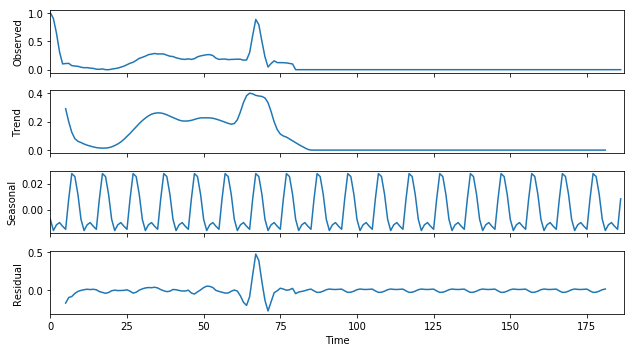

In [43]:
# TIME SERIES PLOT FOR ONE Fusion of ventricular and normal beat IN MIT DATA
import matplotlib
decomposition = sm.tsa.seasonal_decompose(label_3_only_186.iloc[0].values, model='additive', freq=10)
decomposition.plot()
plt.show()

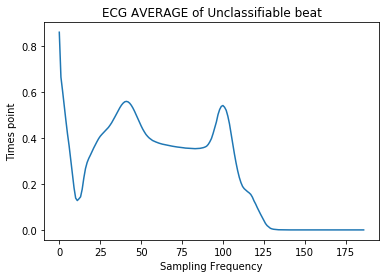

In [19]:
label_4 = merged_mit[merged_mit[187] == 4]
label_4_only_186 = label_4.drop(columns=187)
label_4_mean = label_4_only_186.mean()

plt.plot(label_4_mean)
plt.title('ECG AVERAGE of Unclassifiable beat')
plt.xlabel('Sampling Frequency')
plt.ylabel('Times point');

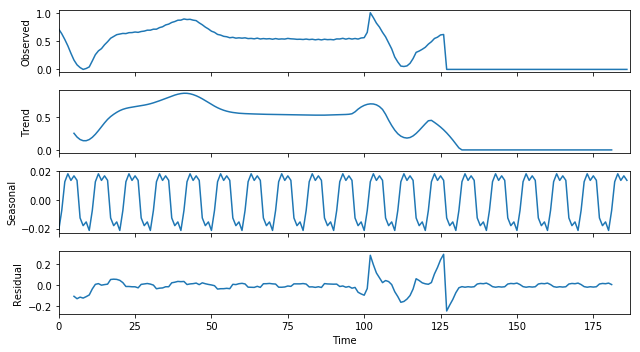

In [44]:
# TIME SERIES PLOT FOR ONE Unclassifiable beat IN MIT DATA
import matplotlib
decomposition = sm.tsa.seasonal_decompose(label_4_only_186.iloc[0].values, model='additive', freq=10)
decomposition.plot()
plt.show()

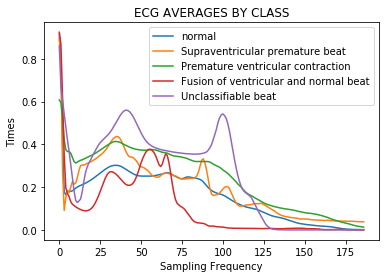

In [20]:
plt.plot(label_0_mean, label='normal')
plt.plot(label_1_mean, label='Supraventricular premature beat')
plt.plot(label_2_mean, label='Premature ventricular contraction')
plt.plot(label_3_mean, label='Fusion of ventricular and normal beat')
plt.plot(label_4_mean, label='Unclassifiable beat')

plt.legend(loc='upper right')
plt.title('ECG AVERAGES BY CLASS')
plt.xlabel('Sampling Frequency')
plt.ylabel('Times');

In [21]:
### FOCUSING ON THE PTB DATABASE ###

In [22]:
print("NORMAL SHAPE: {}, ABNORMAL SHAPE: {}, BOTH: {}".format(normal_data.shape,abnormal_data.shape, merged_ptb.shape))

NORMAL SHAPE: (4046, 188), ABNORMAL SHAPE: (10506, 188), BOTH: (14552, 188)


In [23]:
merged_ptb.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,...,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.0,14552.000000
mean,0.976637,0.721663,0.403099,0.242893,0.207218,0.216453,0.221752,0.224486,0.227349,0.229704,...,0.001190,0.001133,0.000900,0.000739,0.000661,0.000475,0.000177,0.000185,0.0,0.721963
std,0.034532,0.195690,0.249794,0.249519,0.218097,0.192412,0.180740,0.176943,0.176674,0.176579,...,0.021361,0.021012,0.017316,0.014640,0.014033,0.012289,0.006545,0.006835,0.0,0.448047
min,0.624227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.959377,0.584589,0.212300,0.052269,0.061875,0.090487,0.096503,0.097095,0.097231,0.097144,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,1.000000,0.740148,0.371911,0.168148,0.136082,0.159451,0.167479,0.171541,0.177380,0.180337,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
75%,1.000000,0.881483,0.557785,0.336232,0.264104,0.264633,0.286484,0.302255,0.311664,0.325292,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.985523,0.993213,0.997738,...,0.791899,0.773743,0.789804,0.628177,0.602033,0.644880,0.371502,0.376668,0.0,1.000000


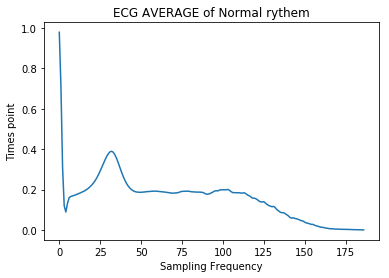

In [24]:
label_0_ptb = merged_ptb[merged_ptb[187] == 0]
label_0_only_186_ptb = label_0_ptb.drop(columns=187)
label_0_mean_ptb = label_0_only_186_ptb.mean()

plt.plot(label_0_mean_ptb)
plt.title('ECG AVERAGE of Normal rythem')
plt.xlabel('Sampling Frequency')
plt.ylabel('Times point');

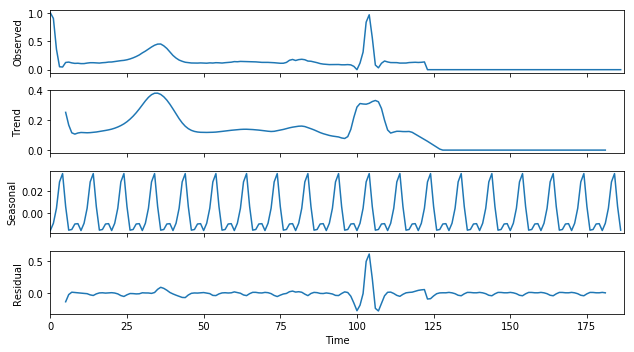

In [45]:
# TIME SERIES PLOT FOR ONE Normal rythem IN PTB DATA
import matplotlib
decomposition = sm.tsa.seasonal_decompose(label_0_only_186_ptb.iloc[0].values, model='additive', freq=10)
decomposition.plot()
plt.show()

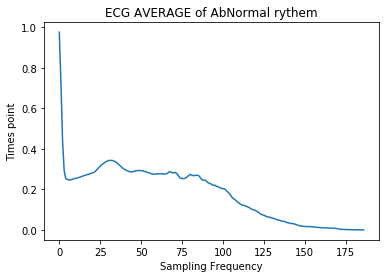

In [25]:
label_1_ptb = merged_ptb[merged_ptb[187] == 1]
label_1_only_186_ptb = label_1_ptb.drop(columns=187)
label_1_mean_ptb = label_1_only_186_ptb.mean()

plt.plot(label_1_mean_ptb)
plt.title('ECG AVERAGE of AbNormal rythem')
plt.xlabel('Sampling Frequency')
plt.ylabel('Times point');

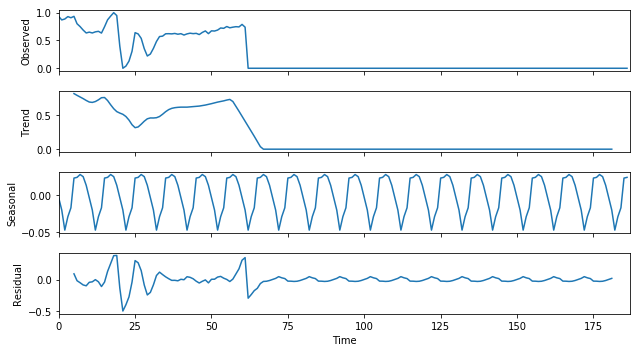

In [46]:
# TIME SERIES PLOT FOR ONE Abormal rythem IN PTB DATA
import matplotlib
decomposition = sm.tsa.seasonal_decompose(label_1_only_186_ptb.iloc[0].values, model='additive', freq=10)
decomposition.plot()
plt.show()

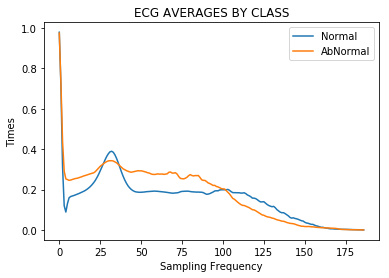

In [26]:
plt.plot(label_0_mean_ptb, label='Normal')
plt.plot(label_1_mean_ptb, label='AbNormal')

plt.legend(loc='upper right')
plt.title('ECG AVERAGES BY CLASS')
plt.xlabel('Sampling Frequency')
plt.ylabel('Times');